In [3]:
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 06 14:14:05 2017

@author: PANGPANG
"""

# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "C:/spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

In [4]:
data = sc.textFile("train.csv")

In [ ]:
data_no_header = data.filter(lambda x: "TRIP_ID" not in x)
data_no_header = data_no_header.map(lambda line:line.strip().split(','))
data_no_header.collect()

In [11]:
data_call_C = data_no_header.filter(lambda x: x[1]=="C")
data_call_C = data_call_C.filter(lambda x: x[8]!="[]")
polyline = data_call_C.map(lambda x:( (x[8]).replace('"[[', '').strip('"')+(x[9]).replace("]", "").strip('"')))

In [12]:
parsedData = polyline.map(lambda line: array([float(x.strip()) for x in line.split(' ')]))


In [13]:
parsedData.collect()

[array([ -8.618643,  41.141412]),
 array([ -8.612964,  41.140359]),
 array([ -8.574678,  41.151951]),
 array([ -8.645994,  41.18049 ]),
 array([ -8.615502,  41.140674]),
 array([ -8.57952 ,  41.145948]),
 array([ -8.617563,  41.146182]),
 array([ -8.611794,  41.140557]),
 array([ -8.615907,  41.140557]),
 array([ -8.619894,  41.148009]),
 array([ -8.56242 ,  41.168403]),
 array([ -8.608716,  41.153499]),
 array([ -8.612208,  41.14053 ]),
 array([ -8.599239,  41.149188]),
 array([ -8.643807,  41.168979]),
 array([ -8.609706,  41.151303]),
 array([ -8.612955,  41.140377]),
 array([ -8.632737,  41.168295]),
 array([ -8.638227,  41.159592]),
 array([ -8.611065,  41.149431]),
 array([ -8.611101,  41.16285 ]),
 array([ -8.600067,  41.182704]),
 array([ -8.610948,  41.150529]),
 array([ -8.609967,  41.140827]),
 array([ -8.611389,  41.150439]),
 array([ -8.639838,  41.159799]),
 array([ -8.612613,  41.145894]),
 array([ -8.688348,  41.173668]),
 array([ -8.628084,  41.158368]),
 array([ -8.65

In [14]:
clusters = KMeans.train(parsedData, 4, maxIterations=1000, initializationMode="random")


In [15]:
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 27.2329507653


In [16]:
clusterData = parsedData.map(clusters.predict)

In [17]:
X = parsedData.collect()

In [18]:
label = clusterData.collect()


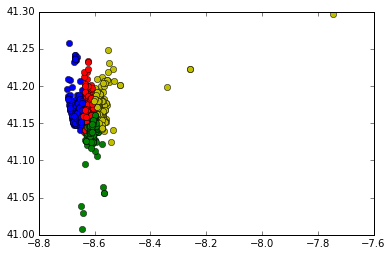

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


for point in range(len(label)):
    if (label[point]==1):
        color = "r";
    elif (label[point]==2):
        color = "g";
    elif (label[point]==3):
        color = "b"
    else:
        color = "y"
    lines = plt.plot(X[point][0], X[point][1], 'ro')
    plt.setp(lines, color=color, linewidth=2.0)